In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## 数据可视化

Pandas 的数据可视化使用 matplotlib 为基础组件。更基础的信息可参阅 matplotlib 相关内容。本节主要介绍 Pandas 里提供的比 matplotlib 更便捷的数据可视化操作。

### 线型图

Series 和 DataFrame 都提供了一个 `plot` 的函数。可以直接画出线形图。

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.describe()

count    1000.000000
mean        3.526470
std        16.243923
min       -20.683881
25%        -9.300320
50%        -1.758149
75%        13.224696
max        42.878495
dtype: float64

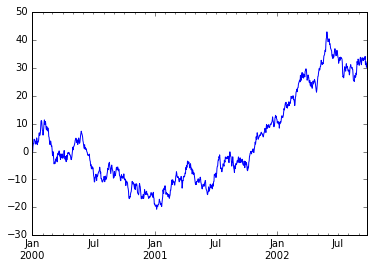

In [3]:
ts.plot();

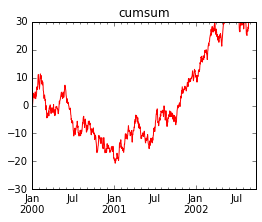

In [4]:
# ts.plot? for more help
ts.plot(title='cumsum', style='r-', ylim=[-30, 30], figsize=(4, 3));

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-9.152453,28.751105,6.435306,4.764281
std,19.177143,11.089815,7.502915,5.644176
min,-52.401351,-2.245964,-9.804085,-7.966805
25%,-22.831177,21.594373,-0.634420,0.299640
50%,-3.333172,28.531865,8.477188,4.178048
75%,5.859582,37.280177,12.433584,9.672910
max,22.480837,50.740147,21.215485,19.161365


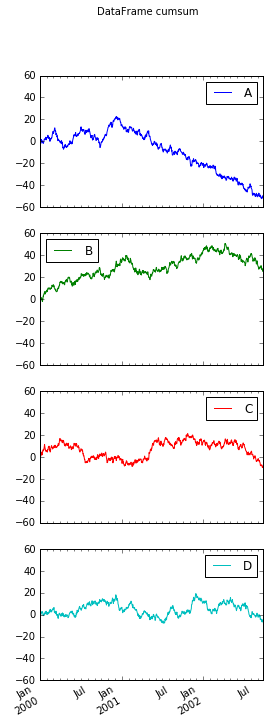

In [6]:
# df.plot? for more help
df.plot(title='DataFrame cumsum', figsize=(4, 12), subplots=True, sharex=True, sharey=True);

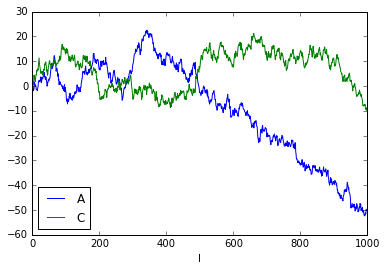

In [7]:
df['I'] = np.arange(len(df))
df.plot(x='I', y=['A', 'C'])

### 柱状图

In [8]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.251322,0.710449,0.677939,0.187400
1,0.082089,0.793091,0.021801,0.287124
2,0.911240,0.802222,0.429064,0.956067
3,0.477370,0.234396,0.303595,0.945137
4,0.471124,0.205507,0.499160,0.887754
5,0.389382,0.062298,0.110157,0.705081
6,0.068719,0.325747,0.951594,0.501131
7,0.365177,0.950995,0.898784,0.822838
8,0.022807,0.721682,0.651013,0.212020
9,0.497862,0.596736,0.486710,0.672207


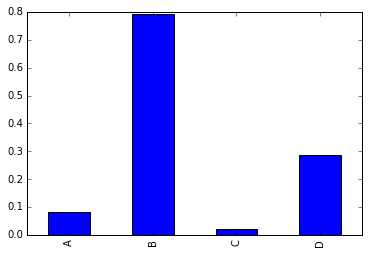

In [9]:
df.ix[1].plot(kind='bar')

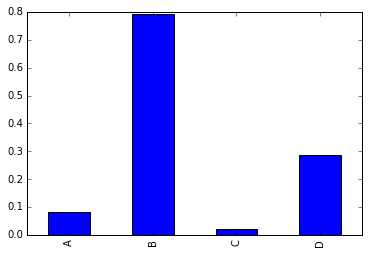

In [10]:
df.ix[1].plot.bar()

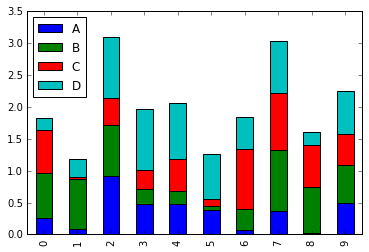

In [11]:
df.plot.bar(stacked=True)

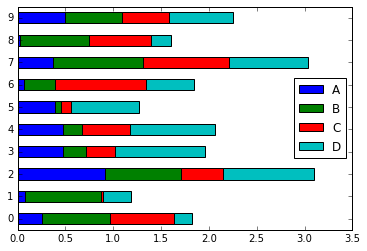

In [12]:
df.plot.barh(stacked=True)

### 直方图

直方图是一种对值频率进行离散化的柱状图。数据点被分到离散的，间隔均匀的区间中，绘制各个区间中数据点的数据。

In [13]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

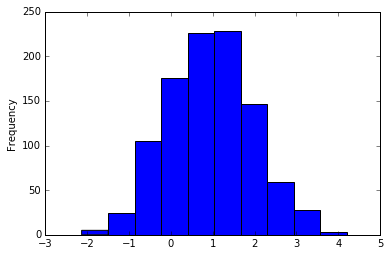

In [14]:
df['a'].plot.hist(bins=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x087FF030>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x086AFFB0>], dtype=object)

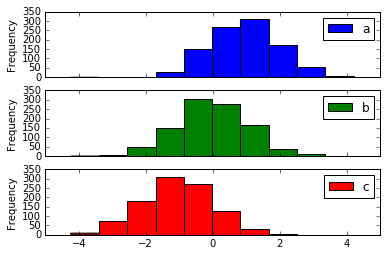

In [15]:
df.plot.hist(subplots=True, sharex=True, sharey=True)

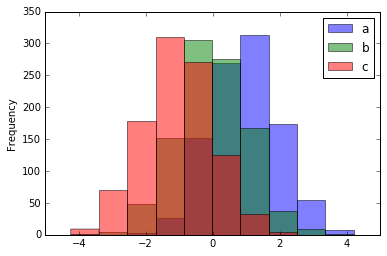

In [16]:
df.plot.hist(alpha=0.5)

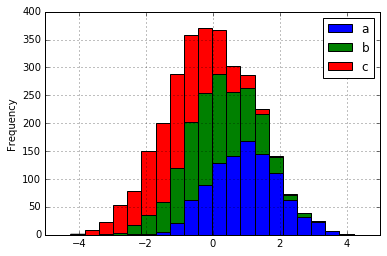

In [17]:
df.plot.hist(stacked=True, bins=20, grid=True)

### 密度图

正态分布（高斯分布）就是一种自然界中广泛存在密度图。比如我们的身高，我们的财富，我们的智商都符合高斯分布。

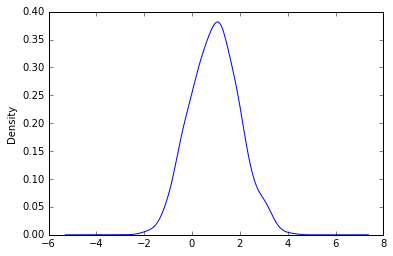

In [18]:
df['a'].plot.kde()

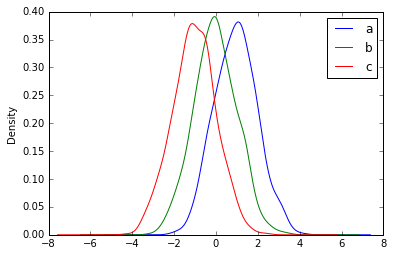

In [19]:
df.plot.kde()

In [20]:
df.mean()

a    0.947151
b   -0.026500
c   -1.039657
dtype: float64

In [21]:
df.std()

a    1.014101
b    1.028685
c    1.030285
dtype: float64

### 带密度估计的规格化直方图

In [22]:
n1 = np.random.normal(0, 1, size=200) # N(0, 1)
n2 = np.random.normal(10, 2, size=200) # N(10, 4)
s = pd.Series(np.concatenate([n1, n2]))
s.describe()

count    400.000000
mean       5.172248
std        5.397582
min       -3.644105
25%        0.061406
50%        3.691510
75%       10.250011
max       16.031112
dtype: float64

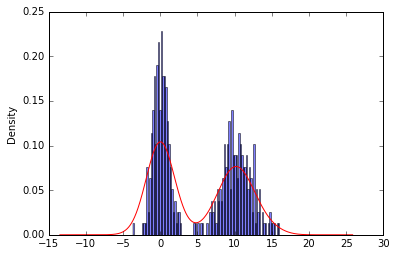

In [23]:
s.plot.hist(bins=100, alpha=0.5, normed=True)
s.plot.kde(style='r-')

### 散布图

散布图是把所有的点画在同一个坐标轴上的图像。是观察两个一维数据之间关系的有效的手段。

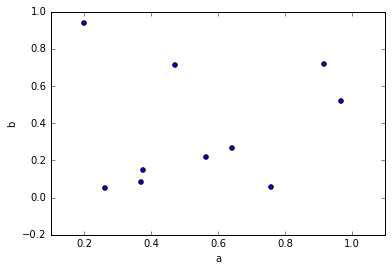

In [24]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

In [25]:
df = pd.DataFrame({'a': np.concatenate([np.random.normal(0, 1, 200), np.random.normal(6, 1, 200)]),
                  'b': np.concatenate([np.random.normal(10, 2, 200), np.random.normal(0, 2, 200)]),
                  'c': np.concatenate([np.random.normal(10, 4, 200), np.random.normal(0, 4, 200)])})
df.describe()

,a,b,c
count,400.000000,400.000000,400.000000
mean,2.974366,5.035267,5.011259
std,3.158428,5.492017,6.572784
min,-3.149143,-5.022496,-13.671181
25%,0.079920,-0.130532,-0.128582
50%,2.800326,5.587717,4.901682
75%,5.923731,10.139781,10.002299
max,8.688234,16.233516,19.855104


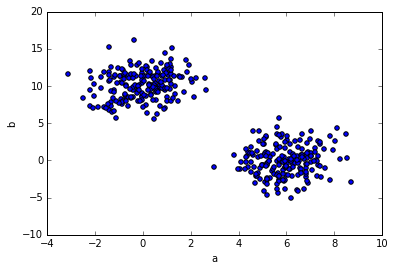

In [26]:
df.plot.scatter(x='a', y='b')

### 饼图

In [27]:
s = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
s

a    0.505096
b    0.295620
c    2.855217
d    2.716670
Name: series, dtype: float64

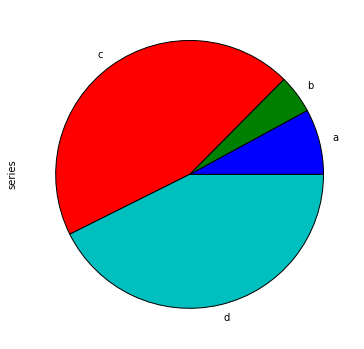

In [28]:
s.plot.pie(figsize=(6,6))

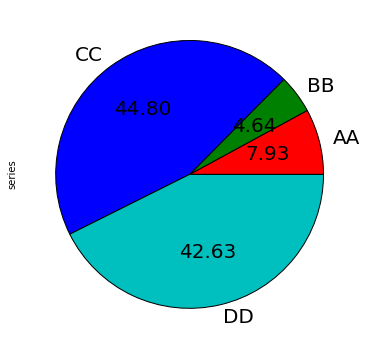

In [29]:
s.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
           autopct='%.2f', fontsize=20, figsize=(6, 6))

In [30]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df

,x,y
a,1.115819,2.348513
b,2.681690,0.816831
c,0.855954,0.380417
d,2.235465,1.958050


array([<matplotlib.axes._subplots.AxesSubplot object at 0x135578D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x138097F0>], dtype=object)

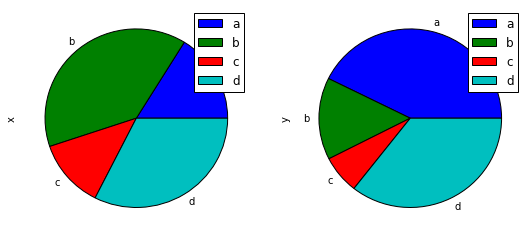

In [31]:
df.plot.pie(subplots=True, figsize=(9, 4))

### 高级绘图

高级绘图函数在 pandas.tools.plotting 包里。

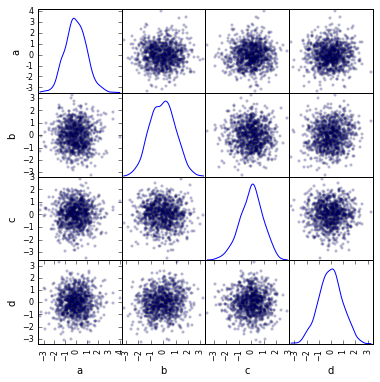

In [32]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

s = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
y = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)
s.plot.

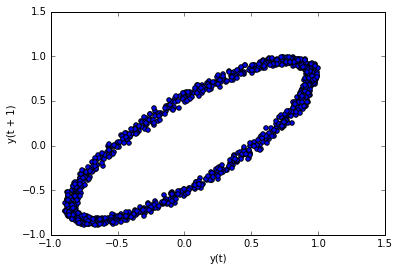

In [33]:
from pandas.tools.plotting import lag_plot

s = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(s);

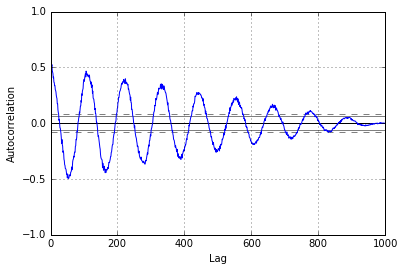

In [34]:
from pandas.tools.plotting import autocorrelation_plot

s = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(s);